# GamePlay Classifier

Given the dataset the classifier classifies the given input image among the games:
- Assassins Creed Franchise
- Doom Reboot Franchaise
- GTA 4/5 Games
- Inside by Playdead
- Need For Speed Franchaise

**GOAL**: The goal is to make a model that can understand the textures used in these games and to be able to differentiate between those textures to identify a game just by using the gameplay footage.


Look at Test2 section where I have used a Car gameplay from GTA-V eventhough all car related gameplays were only given for NFS franchise related. We can see that even though the image contained a car, the model was able to detect that it belonged to GTA-V and not NFS.

## Imports

In [111]:
import numpy as np
import logging
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

## Notebook Configs

In [2]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
logging.getLogger().setLevel(logging.INFO)

## Model Configs

### Seed

In [4]:
random_seed = 100
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

### HyperParameters

In [26]:
TARGET_SHAPE = (256, 256, 3)
TARGET_SIZE = (TARGET_SHAPE[0], TARGET_SHAPE[1])
CHANNELS = TARGET_SHAPE[2]

NO_OF_LAYERS = 3
CONV_FILTERS = [64, 32, 16]
CONV_KERNELS = [(3, 3), (3, 3), (3, 3)]
POOLING_FILTERS = [(2, 2), (2, 2), (2, 2)]
KERNEL_INITIALIZER = 'he_normal'
KERNEL_ACTIVATION = 'relu'
assert len(CONV_FILTERS) == NO_OF_LAYERS
assert len(CONV_KERNELS) == NO_OF_LAYERS
assert len(POOLING_FILTERS) == NO_OF_LAYERS


NO_OF_DENSE_LAYERS = 3
DENSE_UNITS = [128, 32, 5]
DENSE_ACTIVATIONS = ['relu', 'relu', 'softmax']
assert len(DENSE_ACTIVATIONS) == NO_OF_DENSE_LAYERS
assert len(DENSE_UNITS) == NO_OF_DENSE_LAYERS

BATCH_SIZE = 32
EPOCHS = 10
STEPS_PER_EPOCH = 10
OPTIMIZATION = 'adam'
LOSSFN = 'categorical_crossentropy'

## Read Dataset

In [16]:
train_path = 'dataset/train'
test_path = 'dataset/test'

In [17]:
train_img_generator = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, rotation_range=10)

In [18]:
test_img_generator = ImageDataGenerator(rescale=1.0/255)

In [19]:
train_img_dataset = train_img_generator.flow_from_directory(train_path, target_size=TARGET_SIZE, shuffle=True, seed=random_seed, batch_size=BATCH_SIZE)

Found 79 images belonging to 5 classes.


In [20]:
test_img_dataset = test_img_generator.flow_from_directory(train_path, target_size=TARGET_SIZE, shuffle=True, seed=random_seed, batch_size=BATCH_SIZE)

Found 79 images belonging to 5 classes.


## Model

In [21]:
def get_model():
    model = Sequential()
    model.add(Conv2D(CONV_FILTERS[0],
                     CONV_KERNELS[0],
                     activation=KERNEL_ACTIVATION,
                     kernel_initializer=KERNEL_INITIALIZER,
                     input_shape=TARGET_SHAPE))
    model.add(MaxPool2D(pool_size=POOLING_FILTERS[0]))
    for i in range(1, NO_OF_LAYERS):
        model.add(Conv2D(CONV_FILTERS[i],
                         CONV_KERNELS[i],
                         activation=KERNEL_ACTIVATION,
                         kernel_initializer=KERNEL_INITIALIZER))
        model.add(MaxPool2D(pool_size=POOLING_FILTERS[i]))
    model.add(Flatten())
    for i in range(NO_OF_DENSE_LAYERS):
        model.add(Dense(DENSE_UNITS[i], activation=DENSE_ACTIVATIONS[i]))
    
    model.compile(loss=LOSSFN, optimizer=OPTIMIZATION, metrics=['accuracy'])
    return model

In [27]:
model_v1 = get_model()

In [28]:
model_v1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 32)      18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 14400)            

## Model Training

In [29]:
model_v1_history = model_v1.fit(train_img_dataset, steps_per_epoch=STEPS_PER_EPOCH, epochs=EPOCHS, verbose=1)

Epoch 1/10
10/10 [==============================] - 8s 755ms/step - loss: 3.3171 - accuracy: 0.2045
Epoch 2/10
10/10 [==============================] - 8s 755ms/step - loss: 1.3749 - accuracy: 0.3866
Epoch 3/10
10/10 [==============================] - 7s 735ms/step - loss: 1.2382 - accuracy: 0.4603
Epoch 4/10
10/10 [==============================] - 8s 766ms/step - loss: 0.8181 - accuracy: 0.7175
Epoch 5/10
10/10 [==============================] - 8s 788ms/step - loss: 0.5355 - accuracy: 0.8067
Epoch 6/10
10/10 [==============================] - 8s 792ms/step - loss: 0.2755 - accuracy: 0.9008
Epoch 7/10
10/10 [==============================] - 7s 721ms/step - loss: 0.2128 - accuracy: 0.9219
Epoch 8/10
10/10 [==============================] - 7s 745ms/step - loss: 0.1873 - accuracy: 0.9294
Epoch 9/10
10/10 [==============================] - 7s 729ms/step - loss: 0.1144 - accuracy: 0.9683
Epoch 10/10
10/10 [==============================] - 7s 717ms/step - loss: 0.0488 - accuracy: 0.9926

In [30]:
model_v1.evaluate(test_img_dataset,steps=STEPS_PER_EPOCH, verbose=1)

10/10 [==============================] - 4s 437ms/step - loss: 0.0112 - accuracy: 1.0000


[0.011188356205821037, 1.0]

In [135]:
model_v1.save('cnn_3l.h5')

In [136]:
model_v1.save_weights('cnn_3l_adam_10epoch')

## Model Accuracy and Loss visualization

In [59]:
logging.getLogger().setLevel(logging.ERROR)

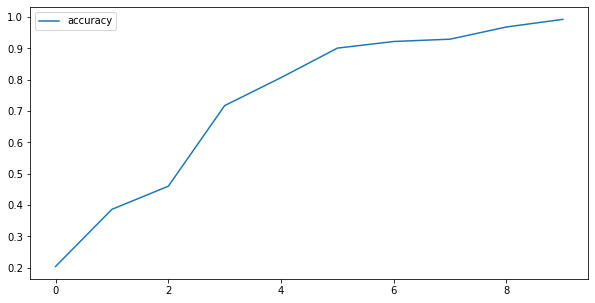

In [40]:
plt.figure(figsize=(10,5))
plt.plot(model_v1_history.history['loss'], label='Loss')
plt.legend(loc='best')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(model_v1_history.history['accuracy'], label='accuracy')
plt.legend(loc='best')
plt.show()

## Model Filters Visualization

### 1st Convolution Layer

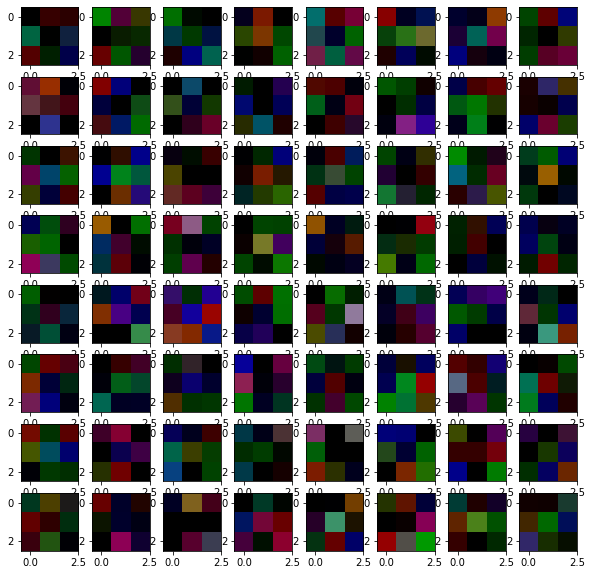

In [60]:
plt.figure(figsize=(10, 10))
for i in range(64):
    subplt = plt.subplot(8, 8, i+1)
    subplt.imshow(model_v1.layers[0].get_weights()[0][:, :, :, i])
plt.show()

### 2nd Convolution layer

In [70]:
plt.figure(figsize=(30, 10))
for i in range(5):
    for j in range(16):
        subplt = plt.subplot(5, 16, i*16+j+1)
        subplt.imshow(model_v1.layers[2].get_weights()[0][:, :, i, j], cmap='gray')
plt.show()

### 3rd Convolution Layer

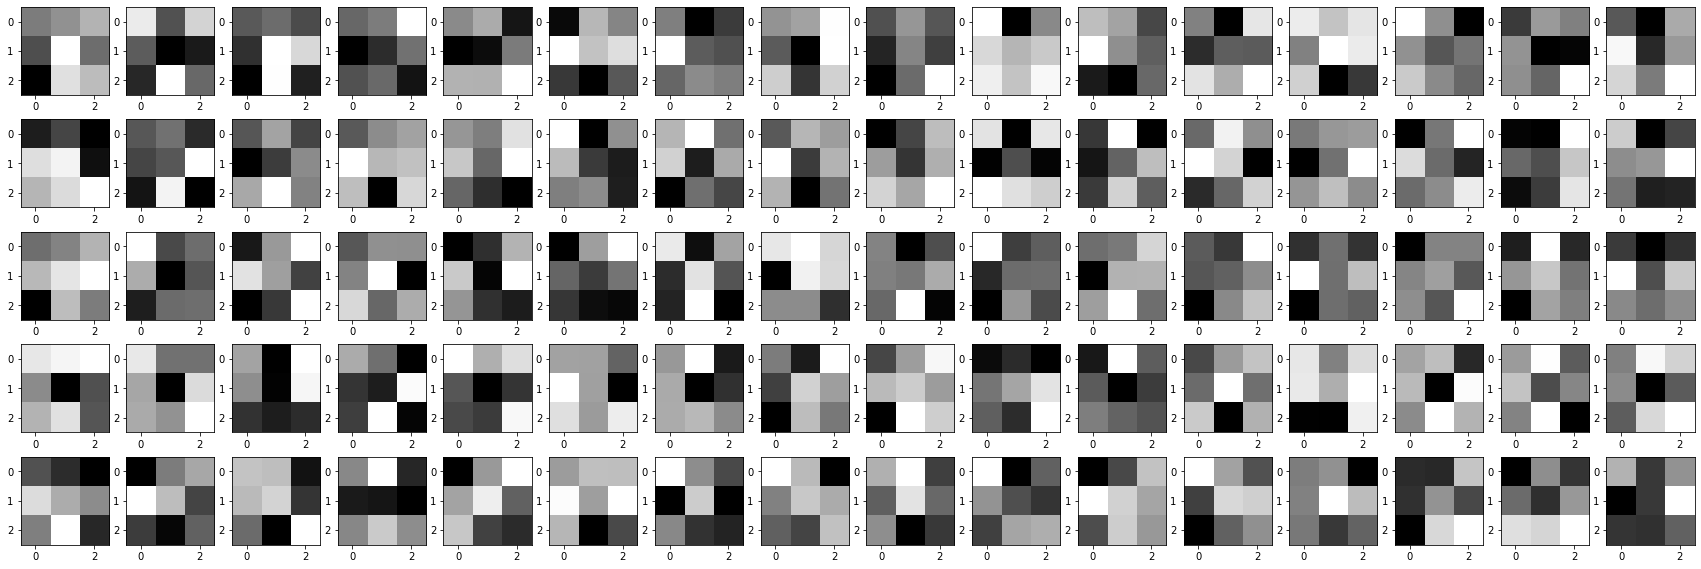

In [72]:
plt.figure(figsize=(30, 10))
for i in range(5):
    for j in range(16):
        subplt = plt.subplot(5, 16, i*16+j+1)
        subplt.imshow(model_v1.layers[4].get_weights()[0][:, :, i, j], cmap='gray')
plt.show()

## Visualizing A single File Output for each Layer

In [101]:
test_img_path = 'dataset/test/gtav/17.jpg'
test_img = load_img(test_img_path)
plt.imshow(test_img)
plt.show()

In [106]:
resized_test_img = test_img.resize(TARGET_SIZE)
resized_test_img = np.array(resized_test_img)

In [109]:
test_prediction = model_v1.predict(resized_test_img.reshape((1, TARGET_SHAPE[0], TARGET_SHAPE[1], TARGET_SHAPE[2])), verbose=1)

1/1 [==============================] - 0s 777us/step


In [110]:
test_prediction

array([[0., 0., 1., 0., 0.]], dtype=float32)

### Creating Extractor for extracting output at each layer

In [113]:
extractors = keras.Model(inputs = model_v1.input, outputs=[layer.output for layer in model_v1.layers])

In [114]:
features = extractors(resized_test_img.reshape((1, TARGET_SHAPE[0], TARGET_SHAPE[1], TARGET_SHAPE[2])))

In [117]:
len(features)

10

### 1st Convolution layer Output

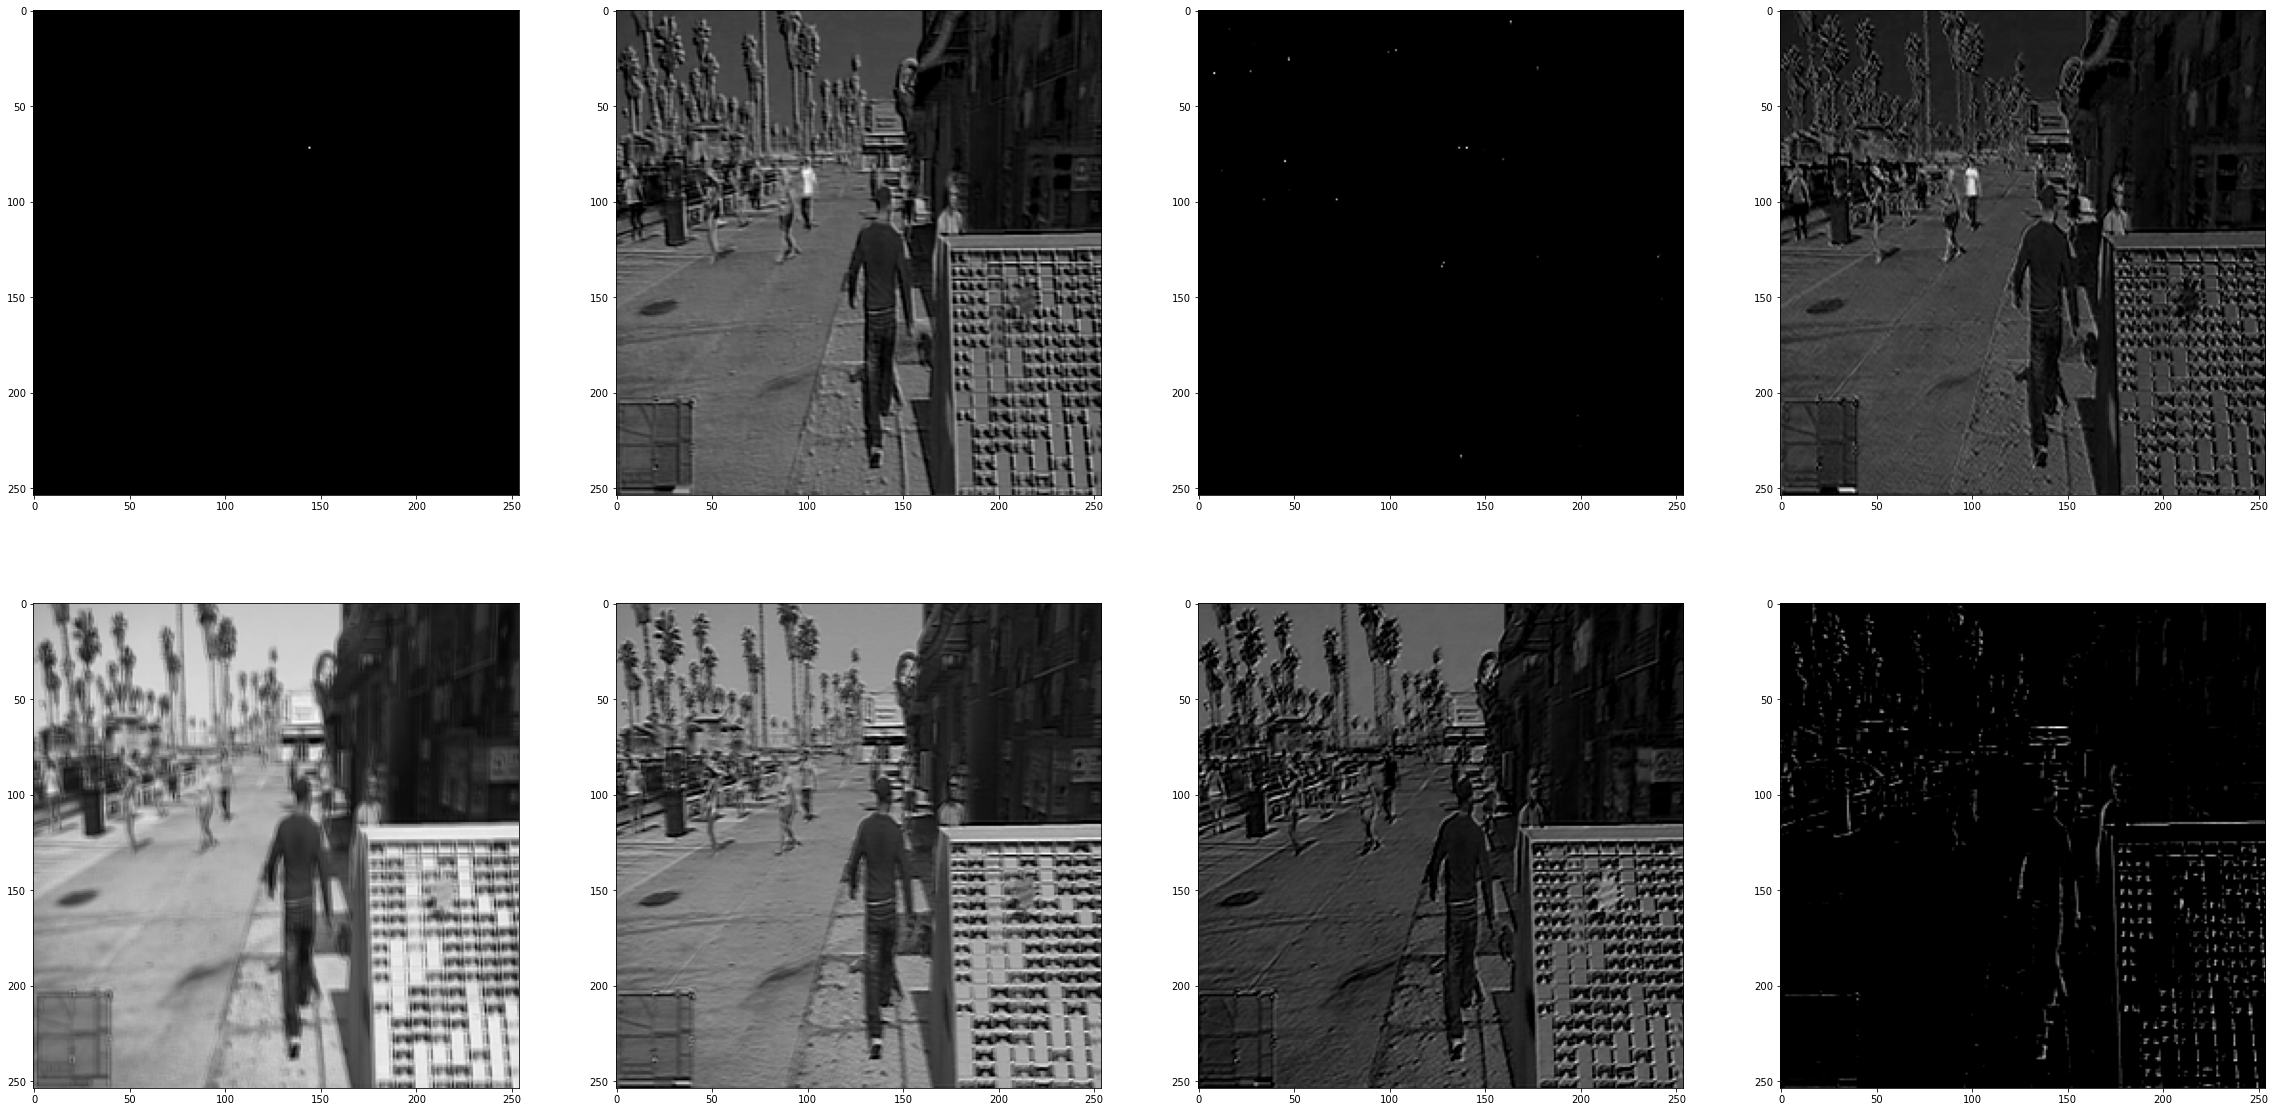

In [122]:
plt.figure(figsize=(40, 20))
for i in range(8):
    subplt = plt.subplot(2, 4, i+1)
    subplt.imshow(features[0][0, :,:,i], cmap='gray')
plt.show()

### 1st Pooling Layer Output

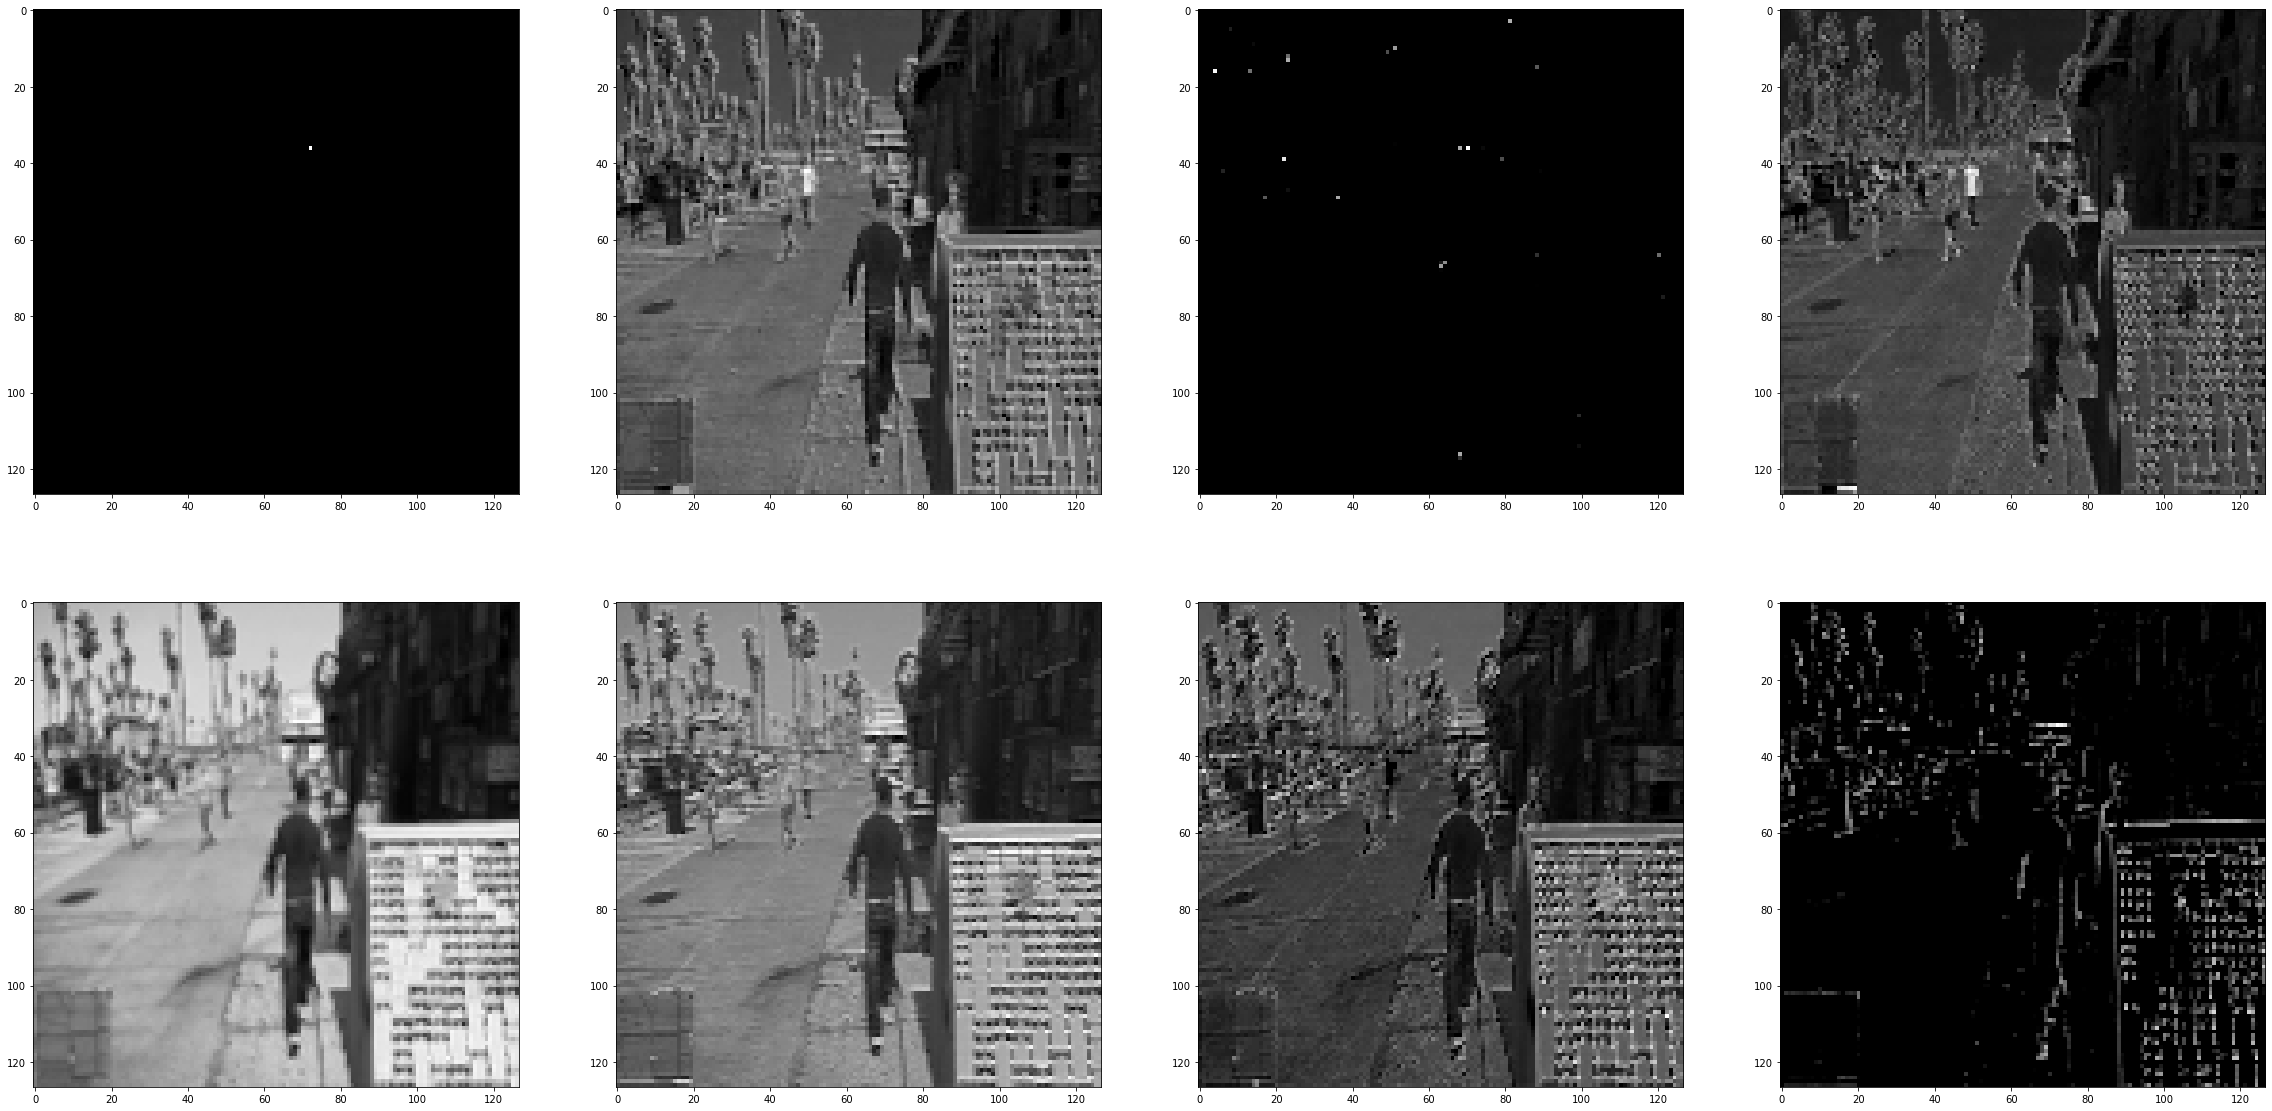

In [132]:
plt.figure(figsize=(40, 20))
for i in range(8):
    subplt = plt.subplot(2, 4, i+1)
    subplt.imshow(features[1][0, :,:,i], cmap='gray')
plt.show()

### 2nd Convolution Layer Output

In [127]:
plt.figure(figsize=(40, 20))
for i in range(8):
    subplt = plt.subplot(2, 4, i+1)
    subplt.imshow(features[2][0, :,:,i], cmap='gray')
plt.show()

### 2nd Pooling Layer Output

In [133]:
plt.figure(figsize=(40, 20))
for i in range(8):
    subplt = plt.subplot(2, 4, i+1)
    subplt.imshow(features[3][0, :,:,i], cmap='gray')
plt.show()

### 3rd Convoltion Layer Output

In [129]:
plt.figure(figsize=(40, 20))
for i in range(8):
    subplt = plt.subplot(2, 4, i+1)
    subplt.imshow(features[4][0, :,:,i], cmap='gray')
plt.show()

### 3rd Pooling layer Output

In [134]:
plt.figure(figsize=(40, 20))
for i in range(8):
    subplt = plt.subplot(2, 4, i+1)
    subplt.imshow(features[5][0, :,:,i], cmap='gray')
plt.show()

## Test 2

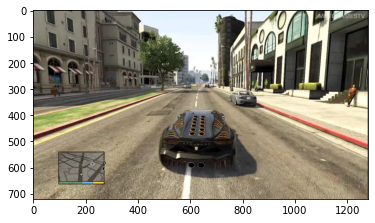

1/1 [==============================] - 0s 1ms/step


In [138]:
test_img_path = 'dataset/train/1.jpg'
test_img = load_img(test_img_path)
plt.imshow(test_img)
plt.show()
resized_test_img = test_img.resize(TARGET_SIZE)
resized_test_img = np.array(resized_test_img)
test_prediction = model_v1.predict(resized_test_img.reshape((1, TARGET_SHAPE[0], TARGET_SHAPE[1], TARGET_SHAPE[2])), verbose=1)

In [139]:
test_prediction

array([[0., 0., 1., 0., 0.]], dtype=float32)

## Conclusion

We can see here that during training, we never gave a 'car' example for training GTA-V textures. All the car examples given belonged to NFS Franchise gameplay. But because the model tried to learn the textures and not the object, thus even though the gameplay looks similar in case of NFS and GTA-V while using a car, the model accurately predicted that it belonged to GTA-V.